# Rapport
- Balthazar Neveu
- balthazarneveu@gmail.com
- [Lab 2 on github](https://github.com/balthazarneveu/MVA23_SIGNAL/tree/lab_2)

Commençons par une première passe d'homogénéisation du jeu de donnée. En effet, l'échantillonnage temporal n'est pas régulier... l'horodatage n'est pas le même pour tous les signaux.
Afin de simplifier la visualisation et le travail sur les données, nous allons simplement ré-échantillonner le tout (timestamps réguliers, échantillonnage à 10HZ).
Chaque signal aura 100 échantillons ce qui permet d'avoir un volume raisonnable et même de supperposer les différents signaux pour les comparer.

In [70]:
from utilities import homogenize_dataset, get_hand_crafted_features, ALL_CLASSIFIERS, train_classifier, get_better_features, extract_peaks, whiten, display_confusion_matrix
from matplotlib import pyplot as plt
import scipy

import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from utilities import homogenize_dataset
num_samples = 100
df = df_train = homogenize_dataset(dataset="train", num_samples=num_samples)
df_test = homogenize_dataset(dataset="test", num_samples=num_samples)
extract_peaks(df_train, add_to_df=True)
extract_peaks(df_test, add_to_df=True)
df.head()


,largeur,frequence,puissance,theta,phi,menace,timestamps_interval_multiples,impulsion_freq,under_peaks_loc,under_peaks_val,peaks_loc,peaks_val
0,"[0.00029099999999999997, 0.0002911010187641941...","[2222011346.301772, 2201167919.9721026, 221708...","[-125.58248735699023, -115.0846158693843, -108...","[0.9578859532471261, 0.8703978859546783, 0.607...","[1.678935775441994, 1.7243409379102963, 1.6140...",False,"[16.0, 8.0, 20.0, 26.0, 12.0, 1.0, 26.0, 4.0, ...",677.048070,"[4, 7, 9, 11, 15, 19, 23, 28, 32, 37, 42, 47, ...","[-141.06251604140348, -137.31479891372942, -14...","[2, 6, 8, 10, 13, 16, 21, 25, 30, 35, 40, 45, ...","[-108.21630369700614, -129.064810778739, -136...."
1,"[0.00013800000000000002, 0.0001369258365512231...","[3011221070.570557, 2996006530.9250755, 300603...","[-127.176799666022, -157.8781625154061, -137.9...","[2.7962717807754327, -2.829550985701179, -2.48...","[1.5296932038533972, 1.5546468454693552, 1.632...",False,"[17.0, 6.0, 7.0, 10.0, 2.0, 35.0, 25.0, 55.0, ...",1092.896175,"[1, 8, 10, 17, 23, 30, 42, 49, 55, 61, 63, 69,...","[-157.8781625154061, -168.09173000783363, -157...","[3, 9, 13, 20, 27, 36, 45, 51, 58, 62, 66, 72,...","[-134.28594495282678, -156.43742404333207, -14..."
2,"[0.000201, 0.0002018786859303869, 0.000201, 0....","[991990464.3038368, 982743904.1435359, 9898809...","[-149.880060930416, -151.7229884218102, -153.5...","[-2.0412578355641227, -1.9204468635231988, -1....","[1.6722396416013094, 1.7759924411327765, 1.509...",True,"[15.0, 5.0, 3.0, 1.0, 2.0, 41.0, 1.0, 20.0, 13...",634.517766,"[5, 9, 13, 17, 21, 24, 28, 31, 35, 38, 42, 45,...","[-183.91728522138138, -172.661412654641, -178....","[7, 11, 15, 19, 22, 26, 30, 33, 37, 40, 44, 47...","[-160.1894729112234, -163.2840780476702, -165...."
3,"[6.800000000000001e-05, 6.928607233324905e-05,...","[1666424017.2021985, 1668061021.2198102, 16641...","[-135.68775777002037, -134.56670065032353, -13...","[-2.621701006244045, -2.2862588398101207, -2.1...","[1.4039557266900524, 1.6190396944122287, 1.690...",False,"[16.0, 3.0, 2.0, 2.0, 8.0, 15.0, 6.0, 23.0, 10...",1466.275660,"[7, 10, 16, 21, 27, 37, 47, 56, 66, 75, 84, 94]","[-140.3923586839108, -142.95012556664386, -164...","[1, 8, 11, 20, 22, 32, 42, 52, 62, 71, 83, 85,...","[-134.56670065032353, -140.1700103525957, -142..."
4,"[0.000324, 0.0003248032831089071, 0.0003248041...","[2207809393.1871147, 2200771938.7002068, 22022...","[-172.60362010919195, -151.87364054688302, -15...","[2.274032092616462, 2.127649080211378, 2.36297...","[1.6134753329852611, 1.6012352706627135, 1.745...",False,"[17.0, 1.0, 4.0, 5.0, 25.0, 27.0, 1.0, 21.0, 2...",604.960678,"[3, 6, 11, 20, 30, 34, 43, 52, 62, 71, 80, 89]","[-157.9410015786667, -173.03619066421422, -162...","[1, 5, 7, 12, 25, 32, 38, 48, 57, 65, 76, 85, 95]","[-151.87364054688302, -151.5424503909395, -155..."


In [72]:
x_train, y_train, labels_features = get_better_features(df_train)
x_test, y_test, _ = get_better_features(df_test)

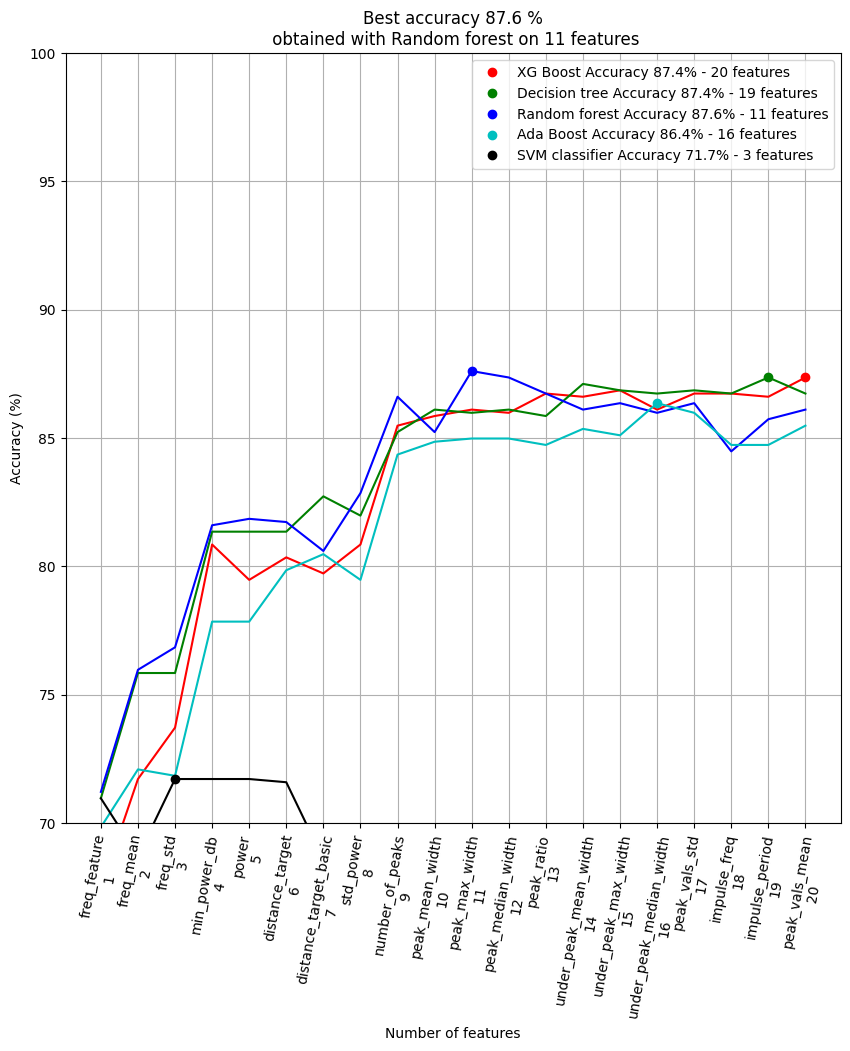

[[371  43]
 [ 56 329]]


In [73]:
whiten_flag=False
# whiten_flag=True
x_train, y_train, labels_features = get_better_features(df_train)
x_test, y_test, _ = get_better_features(df_test)
if whiten_flag:
    x_train, mean, stddev = whiten(x_train)
    x_test, _, _ = whiten(x_test, mean=mean, stddev=stddev)
from utilities import ALL_CLASSIFIERS, DECISION_TREE, RANDOM_FOREST, SVM, ADABOOST, XG_BOOST
COLOR_LIST = "rgbckyp"
best_accuracies_overall = []
best_feature_dimensions = []
best_confusion_matrix_overall = []
# classifiers_list = ALL_CLASSIFIERS #[DECISION_TREE, RANDOM_FOREST, SVM, ADABOOST]
# classifiers_list = [SVM]
classifiers_list = [XG_BOOST,  DECISION_TREE, RANDOM_FOREST, ADABOOST, SVM]
scanned_feature_dimension = list(range(1, len(labels_features)+1))
plt.figure(figsize=(10, 10))
for classifier_index, classifier_type in enumerate(classifiers_list):
    best_accuracies = []
    feature_dimensions = []
    confusion_matrices = []
    color = COLOR_LIST[classifier_index%len(COLOR_LIST)]
    for feature_dimension in scanned_feature_dimension:
        accuracies, best_depth, _, confusion_matrix = train_classifier(x_train, x_test, y_train, y_test, feature_dimension=feature_dimension, debug=False,  show=False, classifier=classifier_type)
        # print(f"#features={feature_dimension} Tree depth={best_depth} accuracy training {accuracies[0]*100:.1f}% | accuracy test {accuracies[1]*100:.1f}%")
        best_accuracies.append(accuracies)
        feature_dimensions.append(feature_dimension)
        confusion_matrices.append(confusion_matrix)
    # plt.plot(feature_dimensions, 100.*np.array(best_accuracies)[:, 0], color+"--", alpha=0.1) #label=f"{classifier_type} accuracy training")
    plt.plot(feature_dimensions, 100.*np.array(best_accuracies)[:, 1], color+"-") #label=f"{classifier_type} accuracy validation")
    best_index = np.argmax(np.array(best_accuracies)[:, 1])
    best_accuracy = best_accuracies[best_index][1]
    best_confusion_matrix = confusion_matrices[best_index]
    best_feature_dimension = feature_dimensions[best_index]
    plt.plot(feature_dimensions[best_index], 100.*best_accuracy, color+"o", label=f"{classifier_type} Accuracy {100*best_accuracy:.1f}% - {best_feature_dimension} features")
    plt.legend()
    best_accuracies_overall.append(best_accuracy)
    best_feature_dimensions.append(best_feature_dimension)
    best_confusion_matrix_overall.append(best_confusion_matrix)
best_classifier_index = np.argmax(np.array(best_accuracies_overall))
plt.title(f"Best accuracy {100*best_accuracies_overall[best_classifier_index]:.1f} %\n"+ 
          f" obtained with {classifiers_list[best_classifier_index]}" +
          f" on {best_feature_dimensions[best_classifier_index]} features")
new_labels = labels_features[:len(scanned_feature_dimension)]
new_labels = [f"{label}\n{feature}" for label, feature in zip(new_labels, scanned_feature_dimension)]
plt.xticks(scanned_feature_dimension, new_labels, rotation=80)
plt.xlabel("Number of features")
plt.ylabel(r"Accuracy (%)")
plt.ylim(70, 100)
plt.grid()
plt.show()

print(best_confusion_matrix_overall[best_classifier_index])



## Phase exploratoire
On commence par chercher des critères simples (statistiques basiques des signaux)  pour classifier les données.

### Min puissance
- Si on fait défiler les signaux de puissance en figeant l'échelle verticale, nous remarquons clairement un "paquet" au dessus des autres.
- Un descripteur très simple pour discriminer la menace correspond au mimimum de la puissance. On sait déjà qu'il n'est pas suffisant (au vu du gros "paquet" vert et rouge)

![](figures/superposition_signaux_puissance.png)


### Moyenne et puissance des fréquences

- L'étude de l'évolution temporelle des fréquences ne révèle pas de fluctuations perceptibles (signaux stationnaires).

![](figures/superposition_signaux_frequence.png)

- On peut simplement évaluer les moments et ainsi tracer la distribution moyenne des fréquences ainsi que l'écart type



En poussant un peu l'étude manuelle des caractéristiques, on commence à arriver à distinguer quelques groupes:
- écart type(1/fréquence)/moyenne(1/fréquence)
- min(puissance)

![](figures/x=freq_avg_y=freq_std_div_freq_avg.png)


Un arbre de décision devrait permettre de classifier les données (partitionner l'espace en plusieurs rectangles).


## Classification basique
Une approche rationnelle consiste à aggréger les caractéristiques et entraîner un classifieur simple (arbre de décisions) en jouant sur sa profondeur.
Plus on ajoute de caractéristiques, plus on espère que la précision du modèle augmente


![decision_tree](figures/decision_tree.png)

- Avec une unique caractéristique (bien choisie) et un unique seuil, nous atteignons 70% de précision.
- En augmentant la profondeur de l'arbre de décision jusqu'à 4, nous atteignons une précision de 75%
- Avec 2 caractéristiques, nous remarquons qu'il est nécessaire d'avoir une profondeur de 4 sur l'arbre de décision afin d'atteindre la précision optimale.
- Nous remarquons qu'au delà d'une profondeur de 6, l'arbre de décision est à la limite de "sur-apprentissage" (la précision sur la base d'entraînement augmente alors que la précision de validation stagne ou commence à diminuer.)

### Basic classifier

In [141]:
# Define the training and testing sets by extracting the features from the dataframes.
x_train, y_train = get_hand_crafted_features(df_train)
x_test, y_test = get_hand_crafted_features(df_test)

### Ultra-simplistic classifiers
Une unique unique caractéristique

In [142]:
feature_dimension=1
accuracies, _, _, confusion_matrix = train_classifier(x_train, x_test, y_train, y_test, feature_dimension=1, forced_depth=feature_dimension, debug=False,  show=False)
print(f"#features={feature_dimension} Tree depth={1} accuracy training {accuracies[0]*100:.1f}% | accuracy test {accuracies[1]*100:.1f}%")
print(f"Confusion matrix:\n{confusion_matrix}")
display_confusion_matrix(confusion_matrix)

#features=1 Tree depth=1 accuracy training 71.1% | accuracy test 68.8%
Confusion matrix:
[[178 236]
 [ 13 372]]
true_negative=178 non-menace samples were classified as non-menaces
false_positive=236 non-menaces were classified as menaces (False alarm)
false_negative=13 menaces were classified as non-menaces (problem = you're under attack and you didn't realize)
true_positive=372 menaces were classified as menaces correctly (you're under attack and you have detected it)


#### Analyse de la matrice de confusion du détecteur **ultra-basique**
Avec le détecteur ultra basique mono-caractéristique permettant d'arriver à 68.8% de précision.
- 236/800 faux positifs signifie qu'on sonne l'alarme pour rien (le système est paranoïaque!)
- 13/800 faux négatifs signifie qu'on ne s'est pas rendu du compte qu'on était menacé...

La précision ne reflète en aucun cas ce  manque d'équilibre. Il serait intéressant lorsqu'on va chercher à améliorer le détecteur
d'essayer d'avoir moins de faux négatifs... 

# Amélioration du détecteur basique

Ajoutons d'autres caractéristiques mentionnées précédemment et découvertes par tatonnement et intuition visuelle.

Cette pratique de conception de caractéristiques manuelle ("handcrafted features" en machine learning) est assez lourde.
- On espère utiliser des corrélations observées à l'oeil lorsqu'on a visualisé les signaux.
- Idéalement, on aimerait que le phénomène physique sous-jacent appuie la conception des features. 

> C'est la première fois que je m'essaie au problème et ce n'est pas facile (et fastidieux!)

#features=1 Tree depth=4 accuracy training 76.3% | accuracy test 75.7%
[[402  12]
 [182 203]]
#features=2 Tree depth=4 accuracy training 80.2% | accuracy test 80.0%
[[414   0]
 [160 225]]
#features=3 Tree depth=4 accuracy training 80.2% | accuracy test 80.0%
[[414   0]
 [160 225]]
#features=4 Tree depth=4 accuracy training 80.2% | accuracy test 80.0%
[[414   0]
 [160 225]]


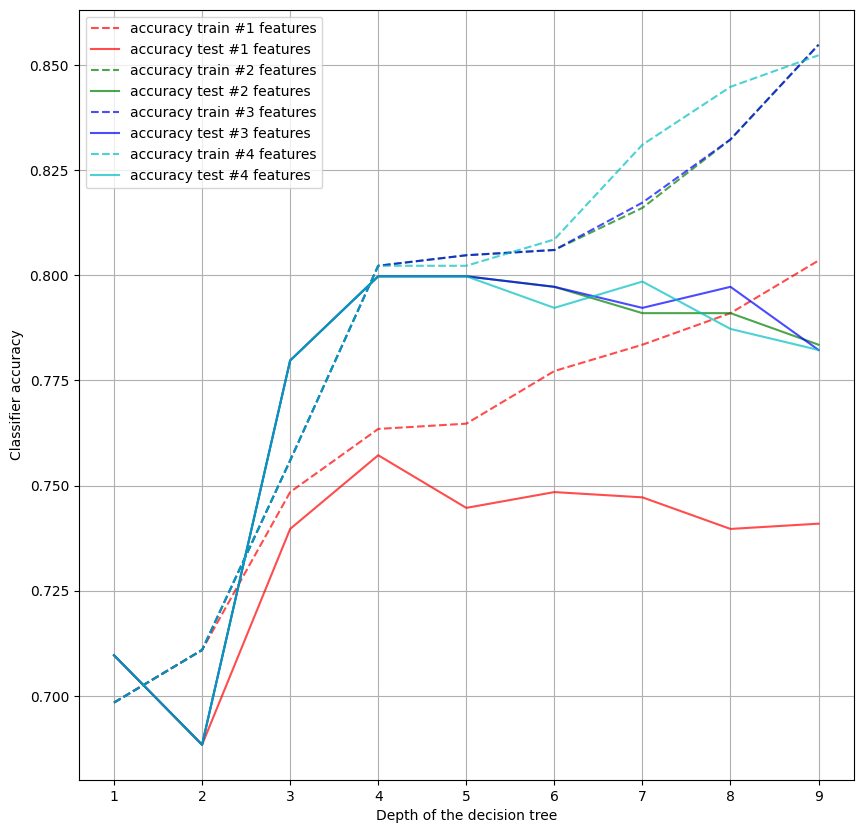

true_negative=414 non-menace samples were classified as non-menaces
false_positive=0 non-menaces were classified as menaces (False alarm)
false_negative=160 menaces were classified as non-menaces (problem = you're under attack and you didn't realize)
true_positive=225 menaces were classified as menaces correctly (you're under attack and you have detected it)


In [117]:
compare_plots = True
plt.figure(figsize=(10, 10))
for feature_dimension in range(1, 5):
    accuracies, best_depth, _, confusion_matrix = train_classifier(x_train, x_test, y_train, y_test, feature_dimension=feature_dimension, debug=True,  show=not compare_plots)
    print(f"#features={feature_dimension} Tree depth={best_depth} accuracy training {accuracies[0]*100:.1f}% | accuracy test {accuracies[1]*100:.1f}%")
    print(confusion_matrix)
if compare_plots:
    plt.grid()
    plt.show()

display_confusion_matrix(confusion_matrix)

### Analyse de la matrice de confusion du détecteur **basique**
Avec la détecteur amélioré permettant d'obtenir 80% de précision:
- 160/800 faux négatifs signifie qu'on ne s'est pas rendu du compte qu'on était menacé...**Ceci est problématique**
- 0/800 faux positifs signifie qu'on ne sonne pas l'alarme pour rien (le système n'est pas paranoïaque!)

La précision ne reflète en aucun cas ce  manque d'équilibre. Il serait intéressant lorsqu'on va chercher à améliorer le détecteur
d'essayer d'avoir moins de faux négatifs... 

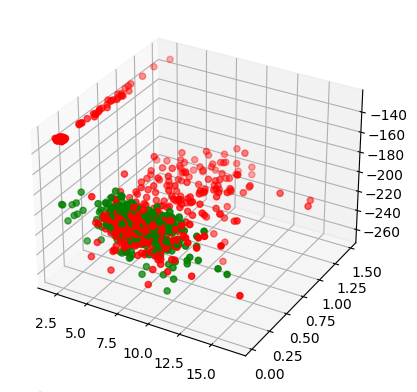

In [144]:
colors = ["r" if el else "g" for el in df["menace"]]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train[:, 2], x_train[:, 0], x_train[:, 1], color=colors)
plt.show()


Difficile de séparer cet amas de points verts et rouge... 
il faut trouver de nouvelles caractéristiques pour aller plus loin.

# Analyzing the time series

Let's first retieve some remaining "difficult" signals to classify.

In [146]:
features_to_keep = 4
accuracies, best_depth, classifier, confusion_matrix = train_classifier(x_train, x_test, y_train, y_test, feature_dimension=features_to_keep, debug=False,  show=False, forced_depth=4)
y_train_pred = classifier.predict(x_train[:, :features_to_keep])
missclassified_indexes = np.where(y_train_pred!=y_train)[0]
display_confusion_matrix(confusion_matrix)


true_negative=414 non-menace samples were classified as non-menaces
false_positive=0 non-menaces were classified as menaces (False alarm)
false_negative=160 menaces were classified as non-menaces (problem = you're under attack and you didn't realize)
true_positive=225 menaces were classified as menaces correctly (you're under attack and you have detected it)


In [147]:
all_indexes = df.index.values
# Get indexes that are not in missclassified_indexes
not_missclassified_indexes = np.setdiff1d(all_indexes, missclassified_indexes)

# Generate
num_indexes_to_choose = 100  # specify the number of indexes you want
random_indexes = np.random.choice(not_missclassified_indexes, num_indexes_to_choose, replace=False)
df_random = df.take(random_indexes).copy().reset_index()

In [123]:
df_hard = df.take(missclassified_indexes).copy()
df_hard.reset_index(inplace=True)

In [126]:
# Here we only have menaces which were missclassified ...
df_hard.menace.sum()/len(df_hard)

1.0

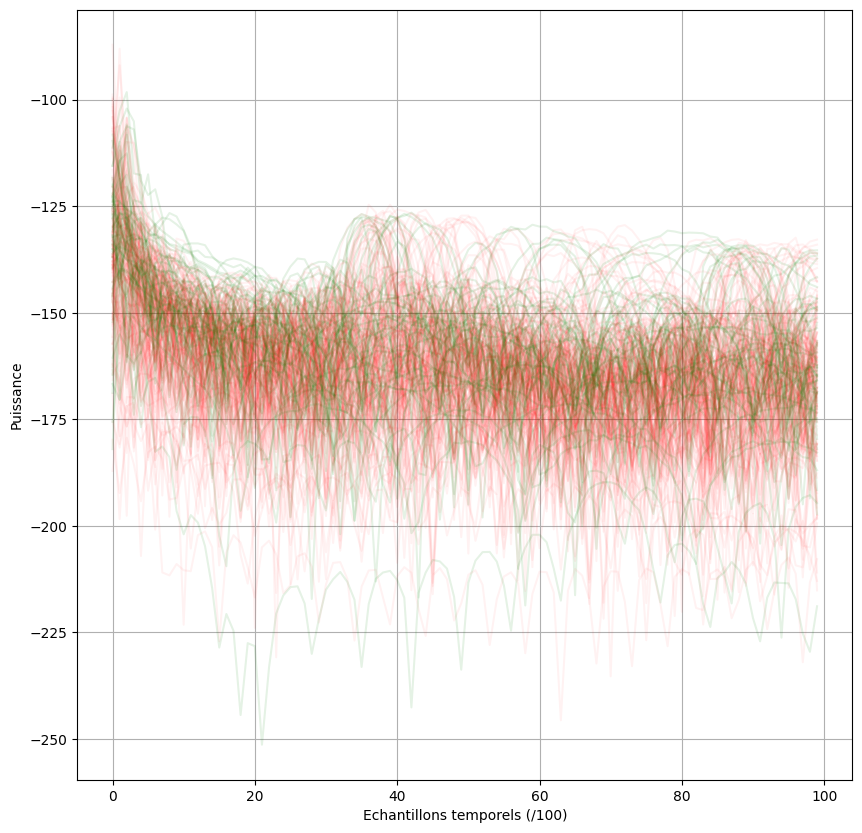

In [133]:
plt.figure(figsize=(10, 10))
plt.plot(np.array([df_hard.puissance[idx] for idx in range(len(df_hard)) if df_hard.menace[idx]]).T, "r", alpha=0.05, label="menace")
plt.plot(np.array([df_hard.puissance[idx] for idx in range(len(df_hard)) if not df_hard.menace[idx]]).T, "g", alpha=0.1, label="safe")
plt.plot(np.array([df_random.puissance[idx] for idx in range(len(df_random)) if not df_random.menace[idx]]).T, "g", alpha=0.1, label="safe")
plt.grid()
plt.ylabel("Puissance")
plt.xlabel("Echantillons temporels (/100)")
plt.show()

- A noter que depuis qu'on a enlevé le faisceaux de courbes qui était au dessus (à l'aide du seuil sur le min des puissances)...la distinction menace/non menace devient plus difficile!
- Très difficile d'observer un motif particulier ici à part que quelques gros lobes se distinguent du reste. On a de toute façon envie d'étudier les lobes car il n'y a plus vraiment d'autres "easy win" à étudier d'après moi.
- On peut utiliser la méthode `scipy.signal.find_peaks` clé en main afin de détecter les pics.
- Etant donné que le signal a été sous échantillonné (100 échantillons réguliers), le signal a l'air faussement peu bruité. Il est important de noter que ceci n'est qu'une impression... les pics sont peut être moins précis. 
> Idéalement : Faire les choses très proprement nécessiterait de mettre en place un débruitage travaillant sur le signal original non décimé, préservant les contours (un simple bilatéral) avant de détecter les pics...

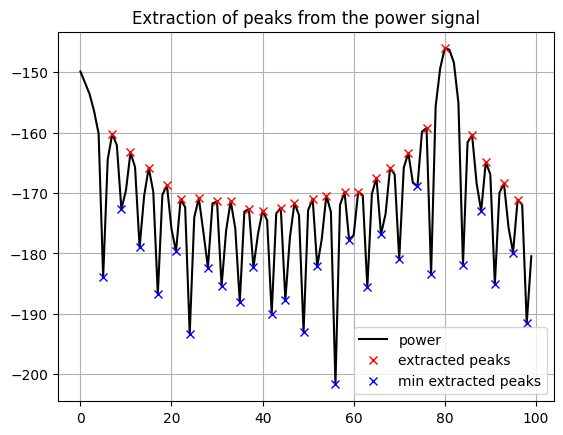

In [129]:
peaks_min, _props =  scipy.signal.find_peaks(-df_hard.puissance[0])
peaks, props =  scipy.signal.find_peaks(df_hard.puissance[0])
plt.plot(df_hard.puissance[0], "k-", label="power")
plt.plot(peaks, df_hard.puissance[0][peaks], "xr", label="extracted peaks")
plt.plot(peaks_min, df_hard.puissance[0][peaks_min], "xb", label="min extracted peaks")
plt.grid()
plt.title("Extraction of peaks from the power signal")
plt.legend()
plt.show()
# np.average(peaks[1:] - peaks[:-1])

On peut alors essayer de **compter le nombre de pics** afin de voir si c'est un critère discriminant. Il semble que oui au vu des histogrammes.
> Cette caractéristique sera incorporée dans le détecteur amélioré

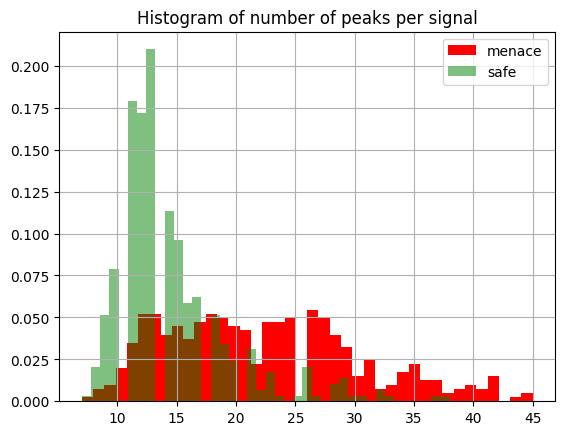

In [135]:
peaks, peak_vals = extract_peaks(df, add_to_df=True)
plt.hist([len(el) for idx, el in enumerate(df.peaks_loc) if df.menace[idx]], color="r", bins=40, label="menace", density=True)
plt.hist([len(el) for idx, el in enumerate(df.peaks_loc) if not df.menace[idx]], color="g", bins=40, alpha=0.5, label="safe", density=True)
plt.title("Histogram of number of peaks per signal")
plt.grid()
plt.legend()
plt.show()

Enfin, j'ai essayé d'exploiter les données des horodatages... par exemple en regardant l'histogramme des fréquences entre les impulsions. (j'enlève les paquets perdus lors de la création des `impulsion_freq`) 

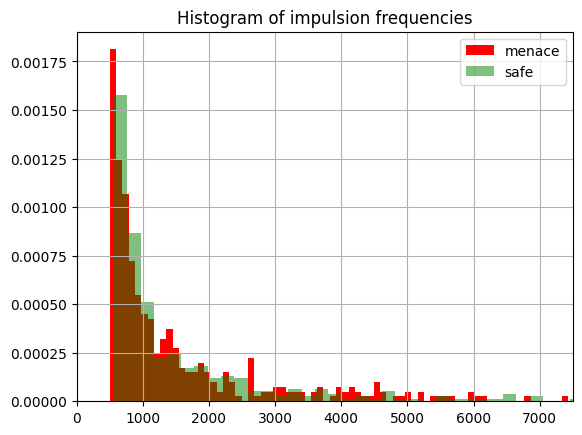

In [138]:
plt.hist([el for idx, el in enumerate(df.impulsion_freq) if df.menace[idx]], color="r", bins=100, label="menace", density=True)
plt.hist([el for idx, el in enumerate(df.impulsion_freq) if not df.menace[idx]], color="g", bins=100, alpha=0.5, label="safe", density=True)
plt.title("Histogram of impulsion frequencies")
plt.grid()
plt.xlim(0, 7500)
plt.legend()
plt.show()